<a href="https://colab.research.google.com/github/mdabir1203/42_WOB_AI_Community/blob/main/SimpleNeuralNetwork(ImageClassification)_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Building a simple neural Network with FashionMNIST database**

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from collections import OrderedDict

# Download training and testing data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
train_ds = datasets.FashionMNIST('F_MNIST_data', download=True, train=True, transform=transform)
test_ds = datasets.FashionMNIST('F_MNIST_data', download=True, train=False, transform=transform)

100%|██████████| 26421880/26421880 [00:01<00:00, 16504851.60it/s]


Extracting F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to F_MNIST_data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 306285.00it/s]


Extracting F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to F_MNIST_data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5530945.96it/s]


Extracting F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to F_MNIST_data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 4214772.01it/s]

Extracting F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to F_MNIST_data/FashionMNIST/raw



In [4]:
# split train set into training (80%) and validation set (20%)
# Good read: https://stackoverflow.com/questions/68104922/optimal-split-for-training-validation-and-testing-sets

train_num = len(train_ds)
indices = list(range(train_num))
np.random.shuffle(indices)
split = int(np.floor(0.2 * train_num))
val_idx, train_idx = indices[:split], indices[split:]
len(val_idx), len(train_idx)

(12000, 48000)

In [6]:
# prepare dataloaders
## code block that shows how to load and display an image from the Fashion-MNIST dataset, which is a collection of 70,000 grayscale images of 10 different types of clothing items.
#Would show different colors for different intensities, which would not reflect the original image. Grayscale is a common choice for plotting images that have one channel.


train_sampler = torch.utils.data.sampler.SubsetRandomSampler(train_idx)
train_dl = torch.utils.data.DataLoader(train_ds, batch_size=64, sampler=train_sampler)
val_sampler = torch.utils.data.sampler.SubsetRandomSampler(val_idx)
val_dl = torch.utils.data.DataLoader(train_ds, batch_size=64, sampler=val_sampler)
test_dl = torch.utils.data.DataLoader(test_ds, batch_size=64, shuffle=True)

torch.Size([1, 28, 28]) torch.Size([64])
Trouser


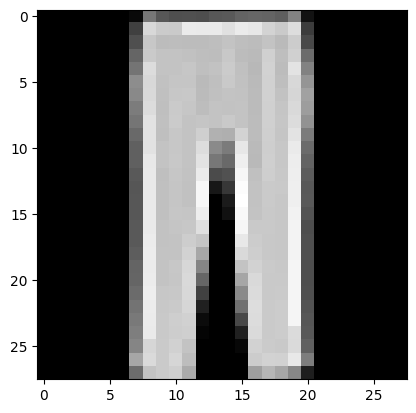

In [7]:
image, label = next(iter(train_dl))
print(image[0].shape, label.shape)
desc = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
print(desc[label[0].item()])
plt.imshow(image[0].numpy().squeeze(), cmap='gray');

# Build the Network

## 3 layers -> nn.Linear -> **Linear Regression**
## **dropout layer** -> 
A dropout layer is a layer that randomly drops out some of the neurons in the previous layer during training, to prevent overfitting12. Overfitting occurs when the model learns the noise or specific patterns in the training data, and fails to generalize well to new or unseen data

## Activation Function -> ReLu , Softmax, tanh 

## Optimizer -> Adam , CrossEntropyLoss

In [15]:
def network():
    model = nn.Sequential(OrderedDict([('fc1', nn.Linear(784, 128)),
                                       ('relu1', nn.ReLU()),
                                       ('drop1', nn.Dropout(0.25)),                                       
                                       ('fc2', nn.Linear(128, 64)),
                                       ('relu2', nn.ReLU()),
                                       ('drop1', nn.Dropout(0.25)),                                       
                                       ('output', nn.Linear(64, 10)),
                                       ('logsoftmax', nn.LogSoftmax(dim=1))]))
    # Use GPU if available
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    model = model.to(device)

    # define the criterion and optimizer
    loss_fn = nn.NLLLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.003)

    return model, loss_fn, optimizer, device        

In [18]:
# Define the Model 

model, loss_fn, optimizer, device = network()
print(model)

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (drop1): Dropout(p=0.25, inplace=False)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (logsoftmax): LogSoftmax(dim=1)
)


# Train the Network

#Epoch
An epoch is one complete pass through the entire training dataset.
-- Metrics --
#train_loss: 
The average loss function value over the training dataset. This measures how well the model fits the training data. A lower value means a better fit.
#val_loss:
The average loss function value over the validation dataset. This measures how well the model generalizes to new data that it has not seen during training. A lower value means a better generalization.
#val_acc:
The accuracy of the model on the validation dataset. This is the percentage of correct predictions out of all predictions. A higher value means a better accuracy.

Epoch: 0 -> train_loss: 0.5786475836435953646, val_loss: 0.4539201259613037109,  val_acc: 83.54%
Epoch: 1 -> train_loss: 0.4564162440498669704, val_loss: 0.3978396058082580566,  val_acc: 85.54%
Epoch: 2 -> train_loss: 0.4217991570035616311, val_loss: 0.3857934772968292236,  val_acc: 86.10%
Epoch: 3 -> train_loss: 0.4028816065390904977, val_loss: 0.3817302584648132324,  val_acc: 86.61%
Epoch: 4 -> train_loss: 0.3885207303563753545, val_loss: 0.3665890693664550781,  val_acc: 86.39%
Epoch: 5 -> train_loss: 0.3790938361088435071, val_loss: 0.3923982679843902588,  val_acc: 85.58%
Epoch: 6 -> train_loss: 0.3666848312914371411, val_loss: 0.3555256724357604980,  val_acc: 87.06%
Epoch: 7 -> train_loss: 0.3618107124169667732, val_loss: 0.3723082840442657471,  val_acc: 86.54%
Epoch: 8 -> train_loss: 0.3553915840685367700, val_loss: 0.3540603518486022949,  val_acc: 87.16%
Epoch: 9 -> train_loss: 0.3490855130652586458, val_loss: 0.3419536054134368896,  val_acc: 87.76%
Epoch: 10 -> train_loss: 0.343

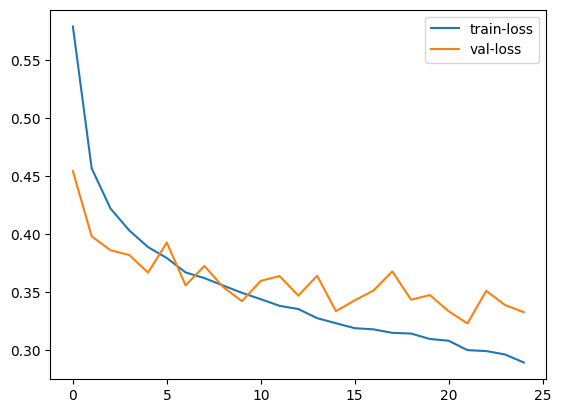

In [19]:
def train_validate(model, loss_fn, optimizer, trainloader, testloader, device, n_epochs=25):
    train_losses = []
    test_losses = []
    for epoch in range(n_epochs):
        # Set mode to training - Dropouts will be used here
        model.train()
        train_epoch_loss = 0
        for images, labels in trainloader:
            images, labels = images.to(device), labels.to(device)
            # flatten the images to batch_size x 784
            images = images.view(images.shape[0], -1)
            # forward pass
            outputs = model(images)
            # backpropogation
            train_batch_loss = loss_fn(outputs, labels)
            optimizer.zero_grad()
            train_batch_loss.backward()
            # Weight updates
            optimizer.step()
            train_epoch_loss += train_batch_loss.item()
        else:
            # One epoch of training complete
            # calculate average training epoch loss
            train_epoch_loss = train_epoch_loss/len(trainloader)

            # Now Validate on testset
            with torch.no_grad():
                test_epoch_acc = 0
                test_epoch_loss = 0
                # Set mode to eval - Dropouts will NOT be used here
                model.eval()
                for images, labels in testloader:
                    images, labels = images.to(device), labels.to(device)                    
                    # flatten images to batch_size x 784
                    #By flattening the images, we are transforming them from a
                    #28x28 matrix of pixels to a vector of 784 pixel values. 
                    #This way, the linear layer can perform a matrix multiplication with the input and the weight matrix.
                    images = images.view(images.shape[0], -1)
                    # make predictions 
                    test_outputs = model(images)
                    # calculate test loss
                    test_batch_loss = loss_fn(test_outputs, labels)
                    test_epoch_loss += test_batch_loss
                    
                    # get probabilities, extract the class associated with highest probability
                    proba = torch.exp(test_outputs)
                    _, pred_labels = proba.topk(1, dim=1)
                    
                    # compare actual labels and predicted labels
                    result = pred_labels == labels.view(pred_labels.shape)
                    batch_acc = torch.mean(result.type(torch.FloatTensor))
                    test_epoch_acc += batch_acc.item()
                else:
                    # One epoch of training and validation done
                    # calculate average testing epoch loss
                    test_epoch_loss = test_epoch_loss/len(testloader)
                    # calculate accuracy as correct_pred/total_samples
                    test_epoch_acc = test_epoch_acc/len(testloader)
                    # save epoch losses for plotting
                    train_losses.append(train_epoch_loss)
                    test_losses.append(test_epoch_loss)
                    # print stats for this epoch
                    print(f'Epoch: {epoch} -> train_loss: {train_epoch_loss:.19f}, val_loss: {test_epoch_loss:.19f}, ',
                          f'val_acc: {test_epoch_acc*100:.2f}%')
    # Finally plot losses
    plt.plot(train_losses, label='train-loss')
    plt.plot(test_losses, label='val-loss')
    plt.legend()
    plt.show()





train_validate(model, loss_fn, optimizer, train_dl, val_dl, device)

Epoch: 0 -> train_loss: 0.2948900642196337629, val_loss: 0.3524935841560363770,  val_acc: 87.71%
Epoch: 1 -> train_loss: 0.2893973886668682050, val_loss: 0.3458710014820098877,  val_acc: 88.02%
Epoch: 2 -> train_loss: 0.2880785933782656905, val_loss: 0.3424800634384155273,  val_acc: 88.25%
Epoch: 3 -> train_loss: 0.2831397073964277977, val_loss: 0.3397692143917083740,  val_acc: 88.11%
Epoch: 4 -> train_loss: 0.2840000248154004314, val_loss: 0.3431292176246643066,  val_acc: 88.05%
Epoch: 5 -> train_loss: 0.2802730108996232539, val_loss: 0.3467640578746795654,  val_acc: 87.82%
Epoch: 6 -> train_loss: 0.2796957523524761235, val_loss: 0.3441950082778930664,  val_acc: 87.83%
Epoch: 7 -> train_loss: 0.2784791395266850711, val_loss: 0.3459127247333526611,  val_acc: 87.99%
Epoch: 8 -> train_loss: 0.2745892880856991014, val_loss: 0.3556938469409942627,  val_acc: 87.64%
Epoch: 9 -> train_loss: 0.2770915341774622398, val_loss: 0.3417805135250091553,  val_acc: 87.97%
Epoch: 10 -> train_loss: 0.279

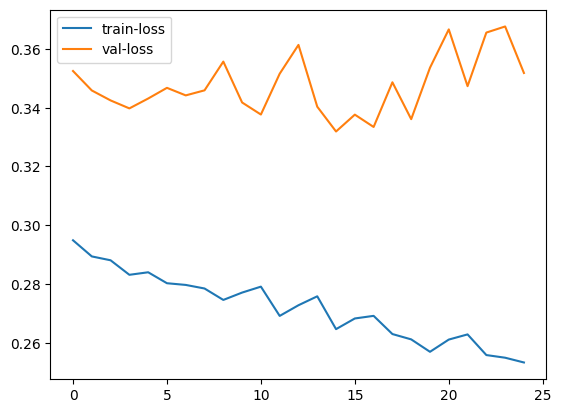

In [20]:
# Train and validate
train_validate(model, loss_fn, optimizer, train_dl, val_dl, device)

#Predict a Single Image


## Problem solve with : images, labels = dataiter.__next__() -> older pytorch used dataiter.next()

##Change the index value to recognize different image size

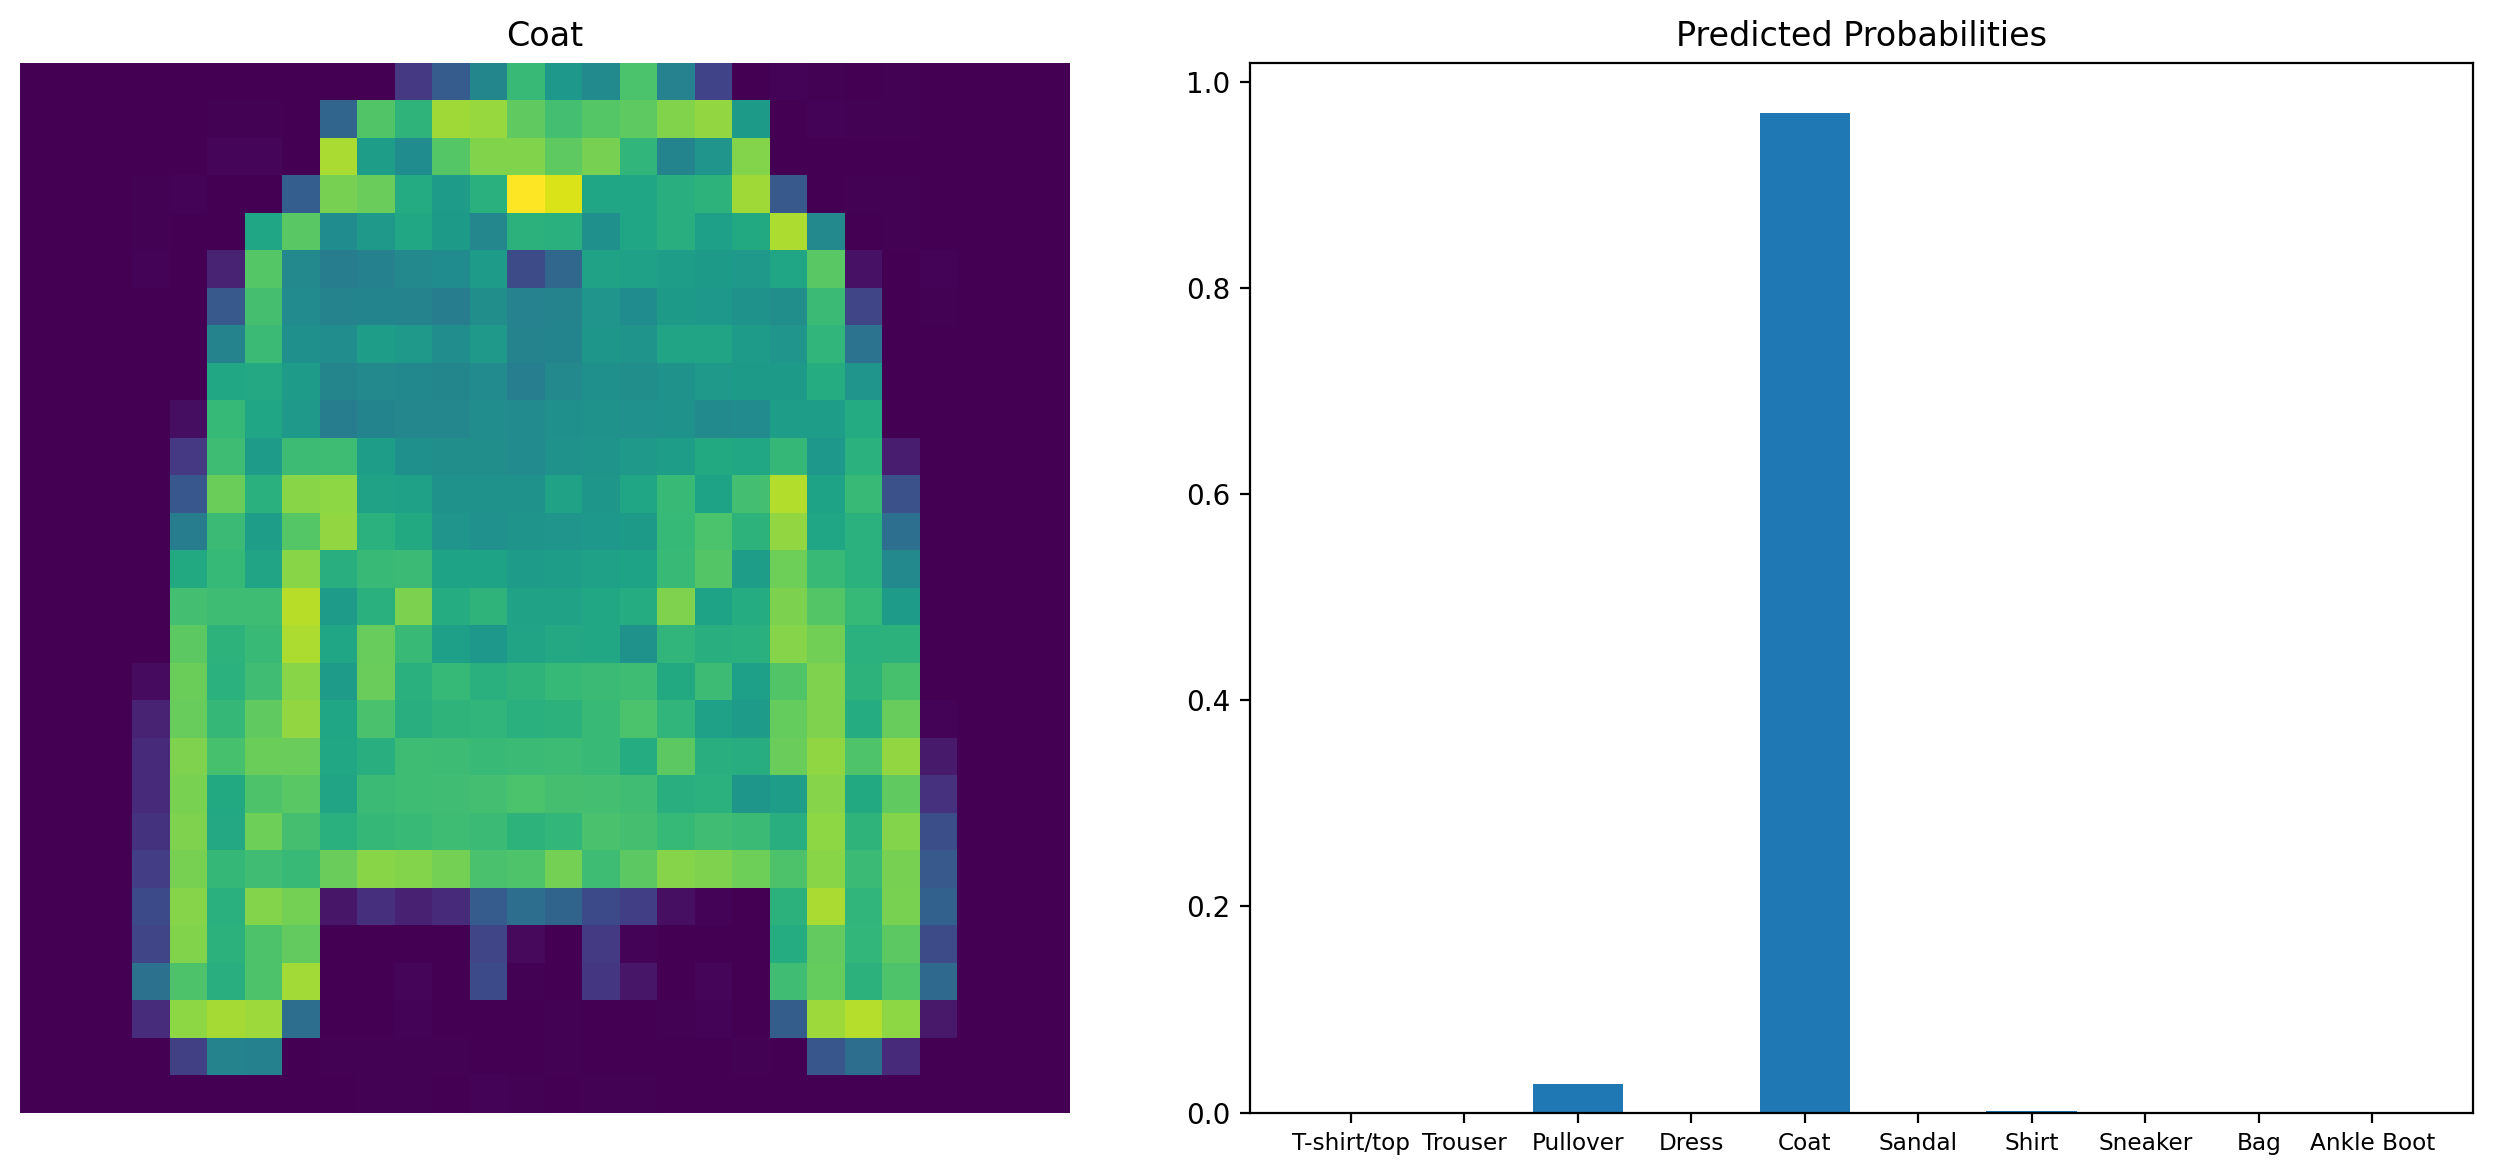

In [26]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Test out the network!
dataiter = iter(test_dl)
images, labels = dataiter.__next__()  #tunpacking the tuples #
images, labels = images.to(device), labels.to(device)
index = 31 ## The index can be any integer between 0 and 63, as the batch size is 64.This will change the image to recognize or you can run next batch to load new one
img, label = images[index], labels[index]
# Convert 2D image to 1D vector
img = img.view(img.shape[0], -1)

# Calculate the class probabilities (softmax) for img
proba = torch.exp(model(img))

# Plot the image and probabilities
desc = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
fig, (ax1, ax2) =  plt.subplots(figsize=(13, 6), nrows=1, ncols=2)
ax1.axis('off')
ax1.imshow(images[index].cpu().numpy().squeeze())
ax1.set_title(desc[label.item()])
ax2.bar(range(10), proba.detach().cpu().numpy().squeeze())
ax2.set_xticks(range(10))
ax2.set_xticklabels(desc, size='small')
ax2.set_title('Predicted Probabilities')
plt.tight_layout()

Validate on Test Set 

In [24]:
# Validate
with torch.no_grad():
    batch_acc = []
    model.eval()
    for images, labels in test_dl:
        images, labels = images.to(device), labels.to(device)
        # flatten images to batch_size x 784
        images = images.view(images.shape[0], -1)
        # make predictions and get probabilities
        proba = torch.exp(model(images))
        # extract the class associted with highest probability
        _, pred_labels = proba.topk(1, dim=1)
        # compare actual labels and predicted labels
        result = pred_labels == labels.view(pred_labels.shape)
        acc = torch.mean(result.type(torch.FloatTensor))
        batch_acc.append(acc.item())
    else:
        print(f'Test Accuracy: {torch.mean(torch.tensor(batch_acc))*100:.2f}%')

Test Accuracy: 87.70%
